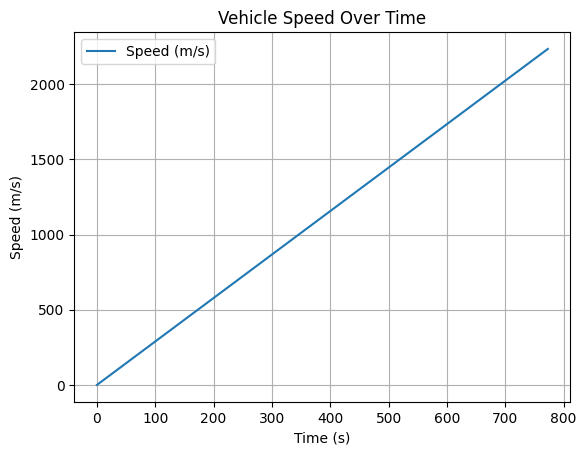

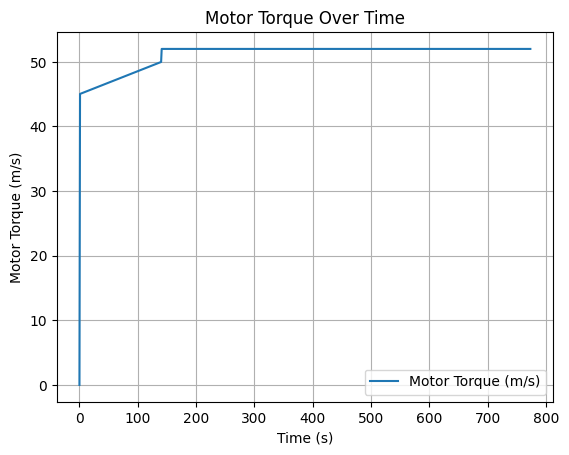

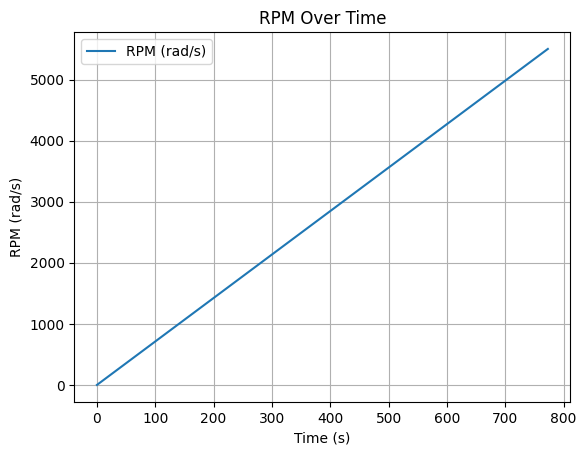

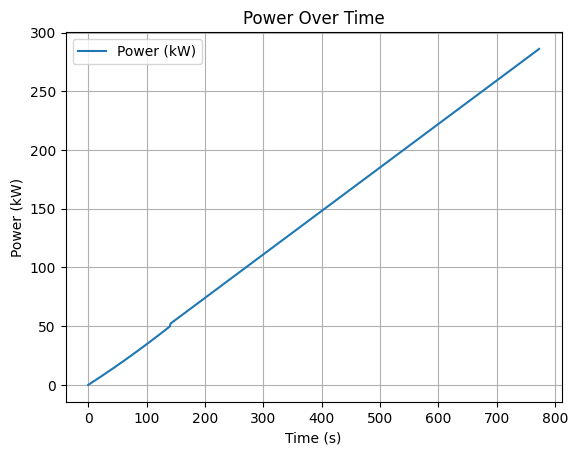

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## CONSTANT ACCEL CASE 

# INITIAL STATES 
pedal_percentage = 1.0 #relative to pedal position (0-1)

max_torque = 240 # Nm
initial_motor_torque = [0] # Nm
initial_speed = 0 # m/s
tire_radius = .4064 # m
wheel_speed = initial_speed / tire_radius
F_d = 40 # N
F_a = max_torque*pedal_percentage / tire_radius # N
F_inertia = 30 # N
mass = 180 # kg
time_steps = 800 # s 
pack_voltage = 600 # V
current = 10 # A 
R_int = 30 # Ohms 

net_force = F_a - F_d - F_inertia

acceleration = net_force / mass 

# TORQUE IS FUNCTION OF RPM, VOLTAGE 

# TORQUE SPEED CURVE , EMRAX 228
def torque_speed_curve(rpm): 
    if rpm < 1000: 
        return .005 * rpm + 45 
    elif rpm < 5500: 
        return 52
    else: 
        return 52

def cell_model(current, power):
    V = [4.2028, 4.1410, 4.0903, 4.0064, 3.9270, 3.7990, 3.7062, 3.6407, 3.5894, 3.5392, 3.4772, 3.3905,   3.3634, 3.3301, 3.2507, 3.1441, 3.0181, 2.8636, 2.7571]




# ITERATING THROUGH STATES 
def state_space(time_steps, initial_speed, acceleration, tire_radius):
    
    speed = [initial_speed]
    rpm=[initial_speed/tire_radius]
    motor_torque = [0] # Nm
    power = [0] # W
    current = [0] # A 
    
    for t in range(1,time_steps): 
        
        new_speed = speed[-1]  + acceleration 
        new_rpm = new_speed/tire_radius

        new_motor_torque = torque_speed_curve(new_rpm)

        power.append((new_motor_torque * new_rpm)/1000)
        motor_torque.append(new_motor_torque)
        speed.append(new_speed)
        rpm.append(new_rpm)
        
        time_array = t+1
        if rpm[t] > 5500:
            break

    return speed, rpm, motor_torque, power, time_array


speed, rpm, motor_torque, power, time_array = state_space(time_steps, initial_speed, acceleration, tire_radius)

## GENERATING PLOTS 
    
time = np.arange(0, time_array)

plt.plot(time, speed, label="Speed (m/s)")
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.title("Vehicle Speed Over Time")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(time, motor_torque, label="Motor Torque (m/s)")
plt.xlabel("Time (s)")
plt.ylabel("Motor Torque (m/s)")
plt.title("Motor Torque Over Time")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(time, rpm, label="RPM (rad/s)")
plt.xlabel("Time (s)")
plt.ylabel("RPM (rad/s)")
plt.title("RPM Over Time")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(time, power, label="Power (kW)")
plt.xlabel("Time (s)")
plt.ylabel("Power (kW)")
plt.title("Power Over Time")
plt.grid(True)
plt.legend()
plt.show()
    
